In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [2]:
from scipy.io import loadmat

In [3]:
import os
for i in os.listdir():
    if 'mat' in i:
        print(i)

ex6data1.mat
ex6data2.mat
ex6data3.mat
spamTest.mat
spamTrain.mat


In [4]:
data = loadmat('ex6data1.mat')
X = data['X']
y = data['y']

In [5]:
df = pd.DataFrame(np.append(X,y,axis=1), columns=['first', 'second', 'target'])
# storing all the three columns in a dataframe

In [6]:
pos = df[df['target']==1]   # target value 1 is stored as positive
neg = df[df['target']==0]   # target value 0 is stored as negative

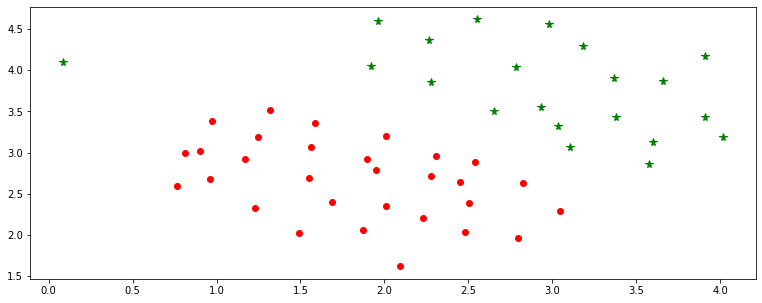

In [7]:
plt.figure(figsize=(13,5))
plt.plot(pos.iloc[:,0], pos.iloc[:,1], 'g*', ms=8)
plt.plot(neg.iloc[:,0], neg.iloc[:,1], 'ro');

In [9]:
def plotBoundary(svm, xmin, xmax, ymin, ymax,title='Decision Boundary'):
    """
    Function to plot the decision boundary for a trained SVM
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the SVM classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    xvals = np.linspace(xmin,xmax,100)
    yvals = np.linspace(ymin,ymax,100)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            zvals[i][j] = float(svm.predict(np.c_[xvals[i],yvals[j]]))
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( u, v, zvals )
    plt.title(title)

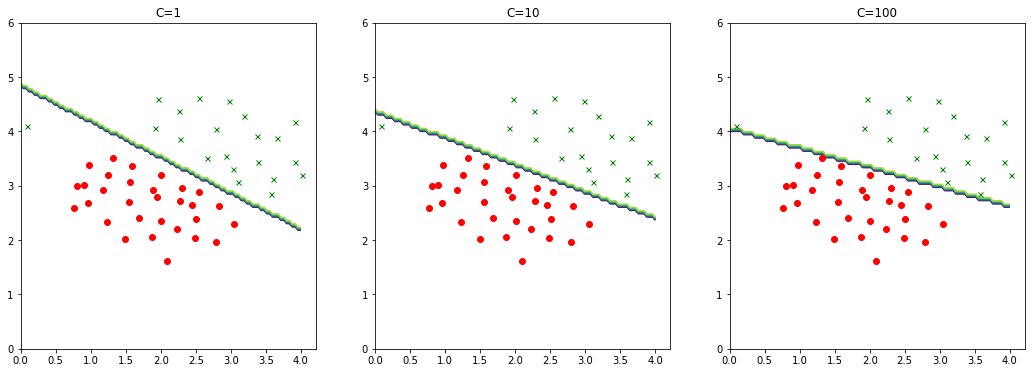

In [11]:
plt.figure(figsize=(18,6))
c_vals = [1,10,100]

for i,c in enumerate(c_vals):
    
    model = SVC(C=c, kernel='linear').fit(X,y)
    
    plt.subplot(1,3,i+1)
    plotBoundary(model,0,4,0,6,title='C={}'.format(c))
    
    plt.plot(pos.iloc[:,0], pos.iloc[:,1], 'gx', ms=5)
    plt.plot(neg.iloc[:,0], neg.iloc[:,1], 'ro')

# Gausian Kernel

In [12]:
def gausian_kernel(x1,x2,sigma):
    x1=x1.ravel()
    x2=x2.ravel()

    sumx1x2 = sum((x1-x2)**2)
    return np.exp(-(sumx1x2 / (2*sigma**2)))
    

In [13]:
x1 = np.array([1,2,1])
x2 = np.array([0,4,-1])
sigma = 2


In [14]:
value_gausian = gausian_kernel(x1,x2,sigma)

print('Gausian kernel between x1 = {} and x2 = {} with sigma value {} is {}'.format(x1,x1,sigma,value_gausian))

Gausian kernel between x1 = [1 2 1] and x2 = [1 2 1] with sigma value 2 is 0.32465246735834974


# Dataset 2

In [15]:
data = loadmat('ex6data2.mat')

X = data['X']
y = data['y']

In [16]:
df = pd.DataFrame(np.append(X,y,axis=1), columns=['first', 'second', 'target'])

pos = df[df['target']==1]   # target value 1 is stored as positive
neg = df[df['target']==0]   # target value 0 is stored as negative

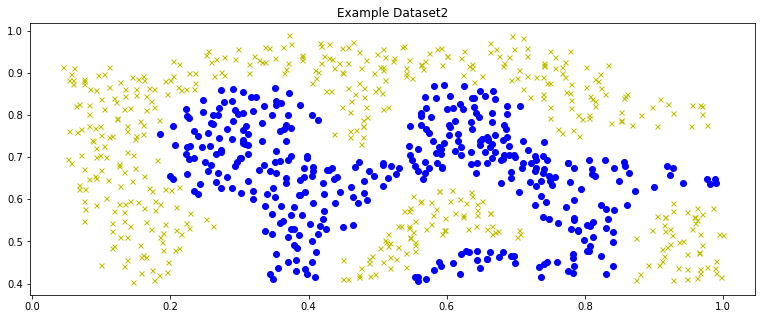

In [17]:
plt.figure(figsize=(13,5))

plt.plot(pos.iloc[:,0], pos.iloc[:,1], 'yx', ms=5)
plt.plot(neg.iloc[:,0], neg.iloc[:,1], 'bo')
plt.title('Example Dataset2');

In [18]:
sigma=0.1
gamma=np.power(sigma,-2)

model2 = SVC(C=1, gamma=gamma,kernel='rbf')
model2.fit(X,y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=99.99999999999999,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

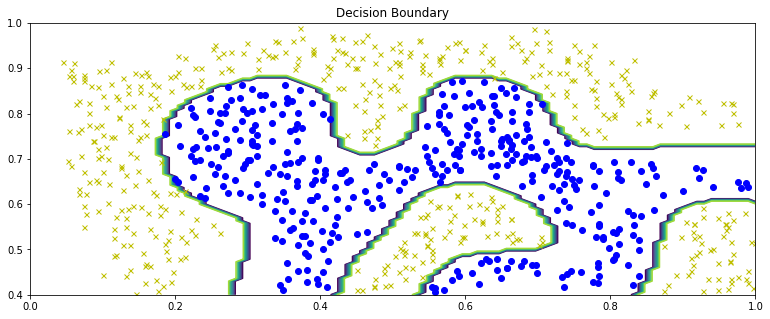

In [20]:
plt.figure(figsize=(13,5))

plotBoundary(model2, 0.0, 1.0, 0.4, 1.0)

plt.plot(pos.iloc[:,0], pos.iloc[:,1], 'yx', ms=5)
plt.plot(neg.iloc[:,0], neg.iloc[:,1], 'bo')
plt.show()

# Dataset 3

In [21]:
data = loadmat('ex6data3.mat')

X = data['X']
y = data['y']

Xval = data['Xval']
yval = data['yval']

In [22]:
X.shape,y.shape, Xval.shape

((211, 2), (211, 1), (200, 2))

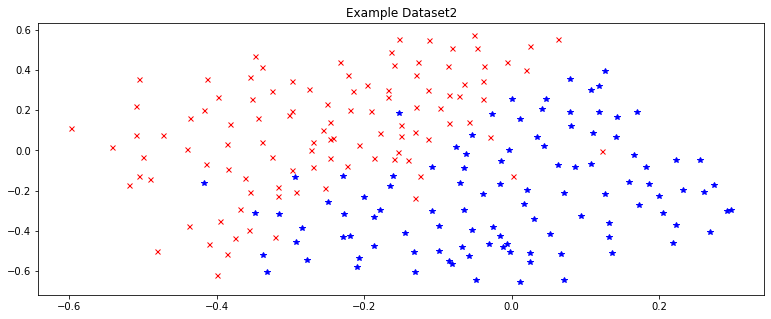

In [23]:
df = pd.DataFrame(np.append(X,y,axis=1), columns=['first', 'second', 'target'])
pos = df[df['target']==1]   # target value 1 is stored as positive
neg = df[df['target']==0]   # target value 0 is stored as negative


plt.figure(figsize=(13,5))

plt.plot(pos.iloc[:,0], pos.iloc[:,1], 'rx', ms=5)
plt.plot(neg.iloc[:,0], neg.iloc[:,1], 'b*')
plt.title('Example Dataset2');

In [24]:
# Finding best values for C and gamma using a for-loop

C_values = [0.001, 0.003,0.1,0.3,1,3,10,30]
sigma_vals = [0.001, 0.003,0.1,0.3,1,3,10,30]
best_params = [(0,0),0]


for i in C_values:
    for j in sigma_vals:
        gamma = np.power(j,-2.0)
        model3 = SVC(C=i, gamma=gamma,kernel='rbf')
        model3.fit(X,y)
        score = model3.score(Xval,yval)
        if score>best_params[1]:
            best_params[1] = score
            best_params[0] = (i,gamma)
print(best_params)

[(0.3, 99.99999999999999), 0.965]


In [25]:
model3 = SVC(C = best_params[0][0], gamma=best_params[0][1], kernel='rbf')
model3.fit(X,y)

SVC(C=0.3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=99.99999999999999,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

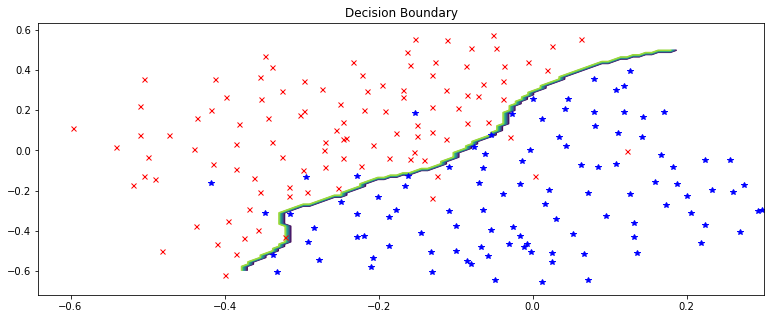

In [26]:
plt.figure(figsize=(13,5))

plotBoundary(model3, -0.5, 0.3, -0.6, 0.5)

plt.plot(pos.iloc[:,0], pos.iloc[:,1], 'rx', ms=5)
plt.plot(neg.iloc[:,0], neg.iloc[:,1], 'b*')

plt.show()